In [1]:
import mdtraj as md
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from funcs_validate_msm import *
from paths import *
from funcs_sample import *
from funcs_abl_featurise import *

In [ ]:
protein = 'abl'
save_dir = Path(f'data_{protein}/plots/')
sample_dir = Path(f'data_{protein}/samples/')
cluster_dir = Path(f'data_{protein}/cluster_centers/')
crystal_files = natsorted([str(f) for f in Path(f"/arc/human_{protein}/").glob("kinoml*.pdb")])
crystal_dbdist = np.array([dbdist_featuriser(md.load(f)) for f in crystal_files]).squeeze()
crystal_dbdihed = np.array([dbdihed_featuriser(md.load(f)) for f in crystal_files]).squeeze()

In [2]:
ftrajs_achelix = [np.load(file) for file in ftraj_achelix_files]
ftraj = np.concatenate(ftrajs_achelix)
data = pd.DataFrame(ftraj[::1000, 0:2]*10, columns=['dist(Nz-Lys745, Cd-Glu762)', 'dist(Ce-Lys860, Cd-Glu762)'])

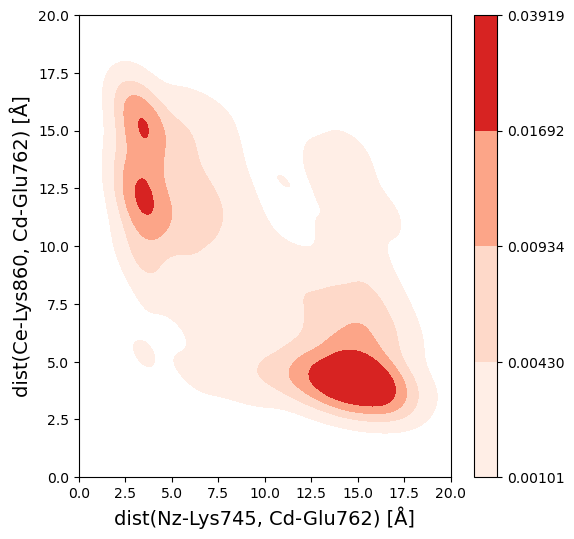

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=data, ax=ax, x='dist(Nz-Lys745, Cd-Glu762)', y='dist(Ce-Lys860, Cd-Glu762)', cbar=True, fill=True, cmap='Reds', levels=5)
ax.set_xlim([0,20])
ax.set_ylim([0,20])
ax.set_xlabel('dist(Nz-Lys745, Cd-Glu762) [Å]', fontsize=14)
ax.set_ylabel('dist(Ce-Lys860, Cd-Glu762) [Å]', fontsize=14)

plt.savefig(save_dir/'aChelix_hist.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [5]:
d1 = [ftraj[:, 0] for ftraj in ftrajs_achelix]
d2 = [ftraj[:, 1] for ftraj in ftrajs_achelix]

In [13]:
ac_samples_a = sample_frames_by_features([d1,d2], [[1.3, 1.6],[0.3, 0.5]], 20)
ac_samples_b = sample_frames_by_features([d1,d2], [[0.25, 0.35],[1.1, 1.25]], 20)
ac_samples_c = sample_frames_by_features([d1,d2], [[0.25, 0.35],[1.45, 1.55]], 20)

In [14]:
save_samples(ac_samples_a, traj_files, 'ac_samples_a.pdb')
save_samples(ac_samples_b, traj_files, 'ac_samples_b.pdb')
save_samples(ac_samples_c, traj_files, 'ac_samples_c.pdb')

In [ ]:
dfg_in_samples = md.load("./data_egfr/msm/dunbrack_studies/lag100_random_trials/61/MS_0.pdb")
dfg_out_samples = md.load("./data_egfr/msm/dunbrack_studies/lag100_random_trials/61/MS_1.pdb")